In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Encode ? as NaN

In [8]:
df[df=='?']=np.NaN

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## Drop NaN Rows

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA

In [14]:
df_2=df.copy()

### Income Group Breakup

In [15]:
df_2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [16]:
income=df_2['income'].value_counts(normalize=True).rename_axis('Income').reset_index(name='Percentage')

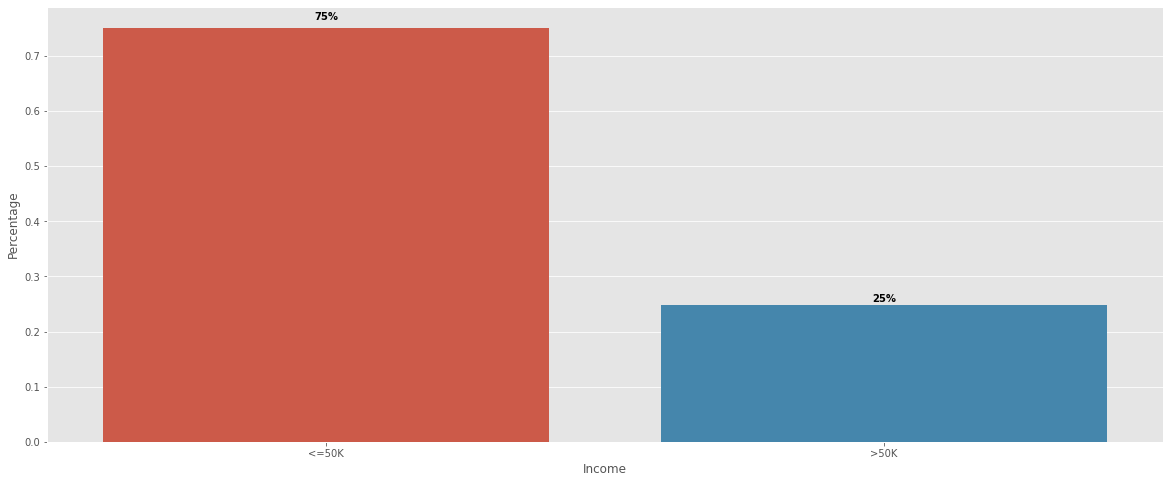

In [17]:
ax=sns.barplot(x=income['Income'], y=income['Percentage'])

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

### Income by Age Group

In [18]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_2['age_group'] = df_2['age'].apply(age_group)

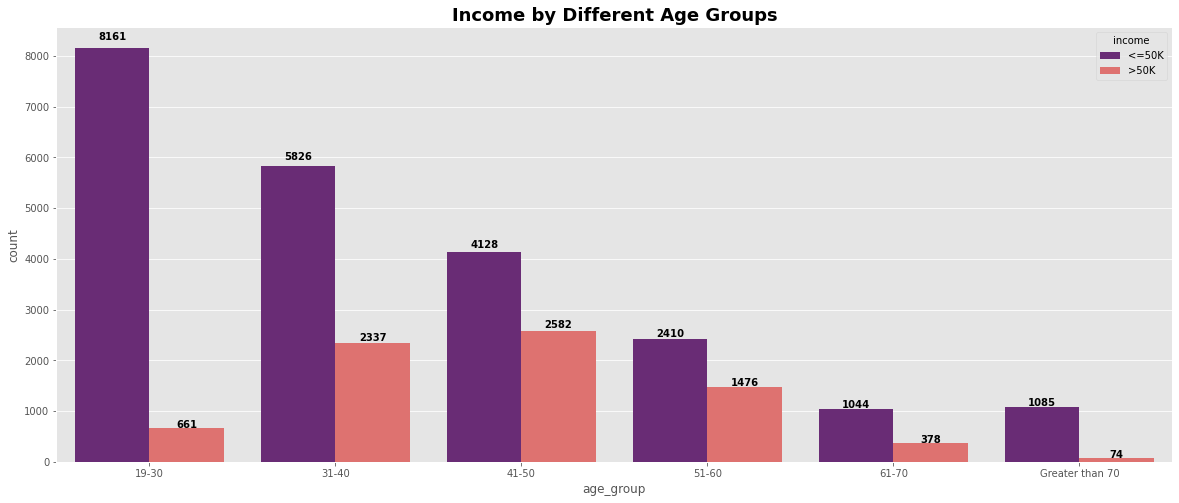

In [19]:
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
ax=sns.countplot(df_2['age_group'], hue=df_2['income'], order=order_list , palette='magma')
plt.title('Income by Different Age Groups', fontsize=18, fontweight='bold')

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

### Income by Work Class

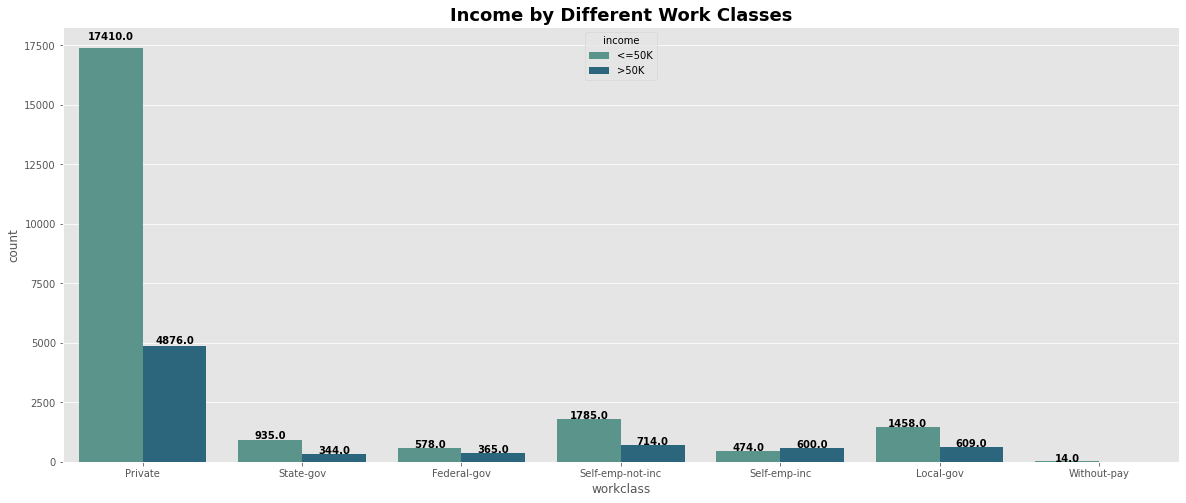

In [20]:
ax=sns.countplot(df_2['workclass'], hue=df_2['income'],palette='crest')
plt.title('Income by Different Work Classes', fontsize=18, fontweight='bold')

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

### Income by Education Level

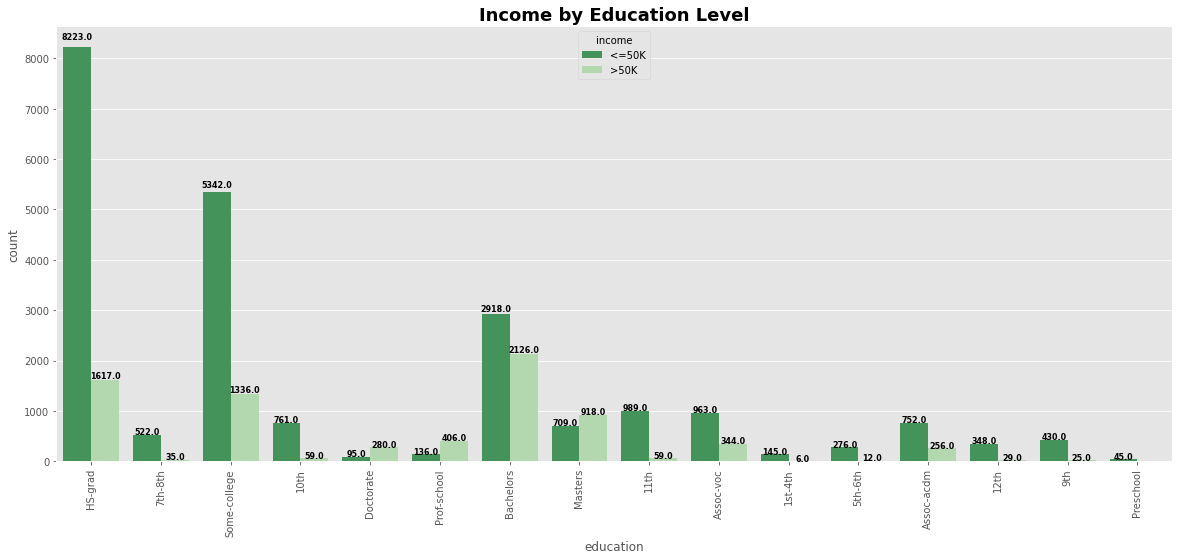

In [21]:
ax=sns.countplot(df_2['education'], hue=df_2['income'], palette='Greens_r')
plt.title('Income by Education Level', fontsize=18, fontweight='bold')

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontweight='bold', fontsize=8)
    
plt.xticks(rotation = 90);

### Income by Marital Status

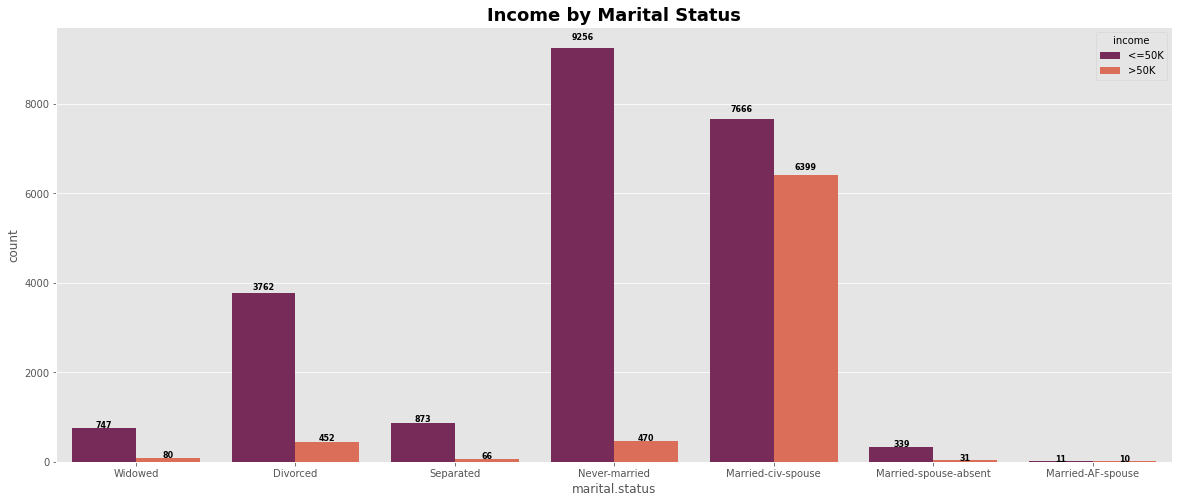

In [22]:
ax=sns.countplot(df_2['marital.status'], hue=df_2['income'], palette='rocket')
plt.title('Income by Marital Status', fontsize=18, fontweight='bold')

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontweight='bold', fontsize=8);

### Income by Occupaton

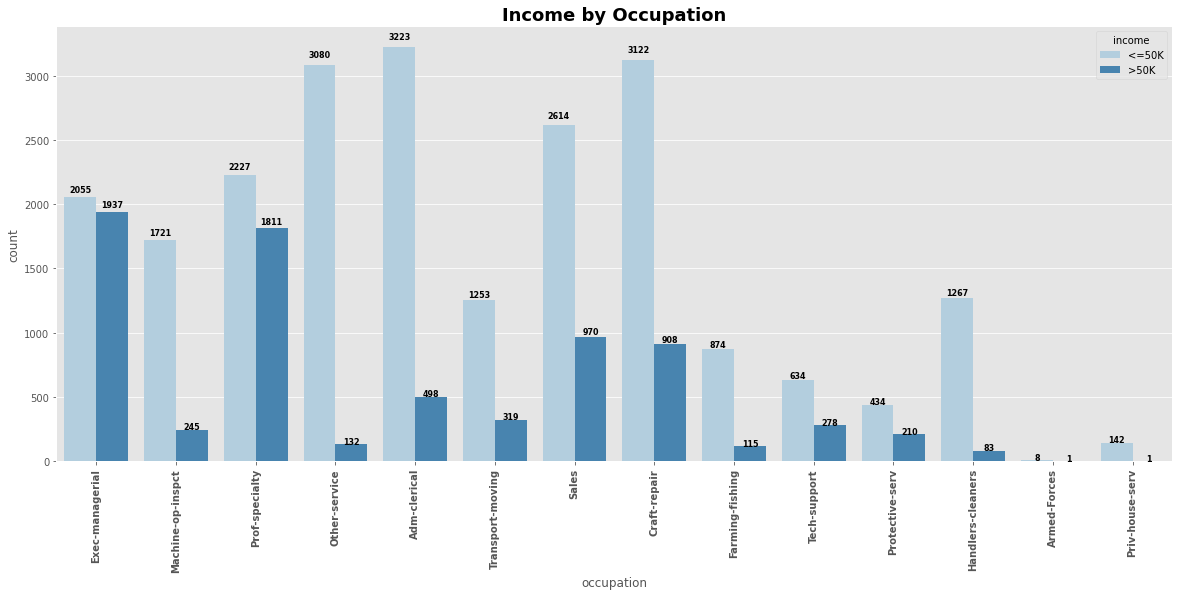

In [23]:
ax=sns.countplot(df_2['occupation'], hue=df_2['income'], palette='Blues')
plt.title('Income by Occupation', fontsize=18, fontweight='bold')

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontweight='bold', fontsize=8)

plt.xticks(rotation=90,fontweight='bold');

### Income by Different Races

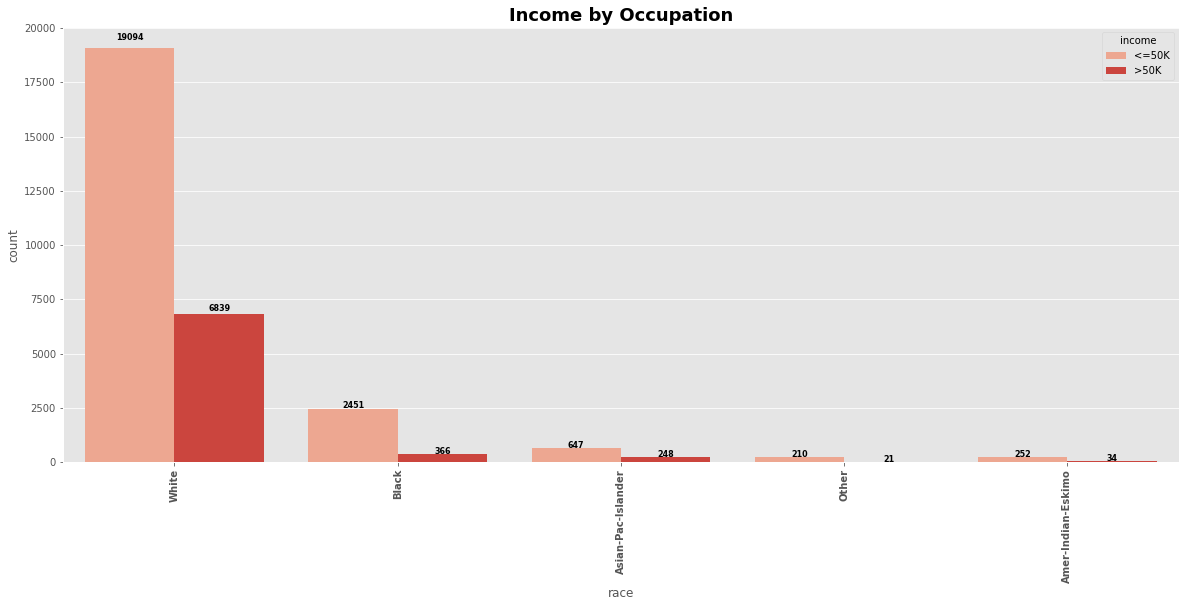

In [24]:
ax=sns.countplot(df_2['race'], hue=df_2['income'], palette='Reds')
plt.title('Income by Occupation', fontsize=18, fontweight='bold')

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontweight='bold', fontsize=8)

plt.xticks(rotation=90,fontweight='bold');

### Income Breakdown by Gender

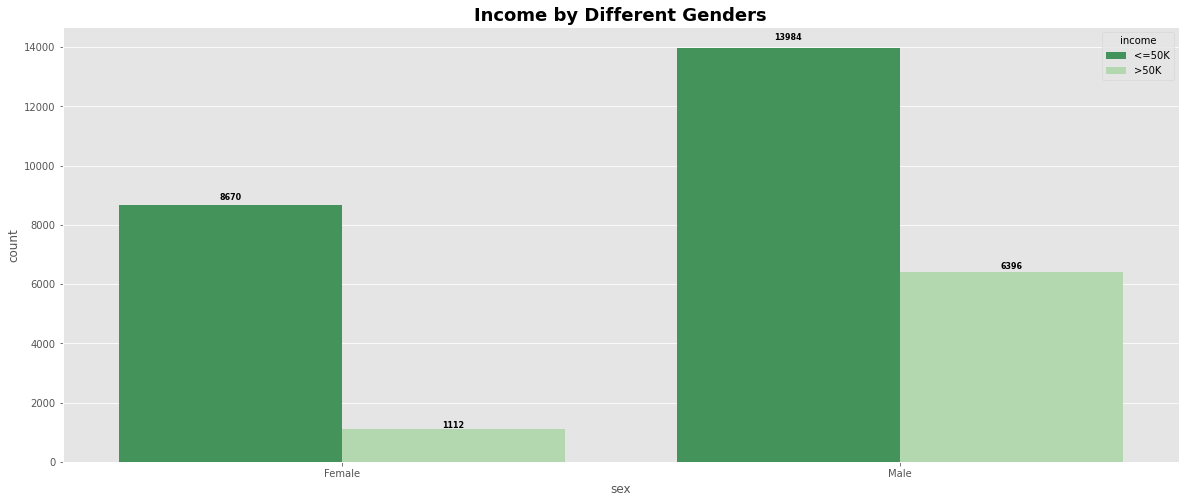

In [25]:
ax=sns.countplot(df_2['sex'], hue = df_2['income'], palette='Greens_r')
plt.title('Income by Different Genders', fontsize=18, fontweight='bold')

# add the annotation
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontweight='bold', fontsize=8)

### Heatmap of Correlation Between Features

In [26]:
df['income']=df_2['income'].map({'<=50K': 0, '>50K': 1})

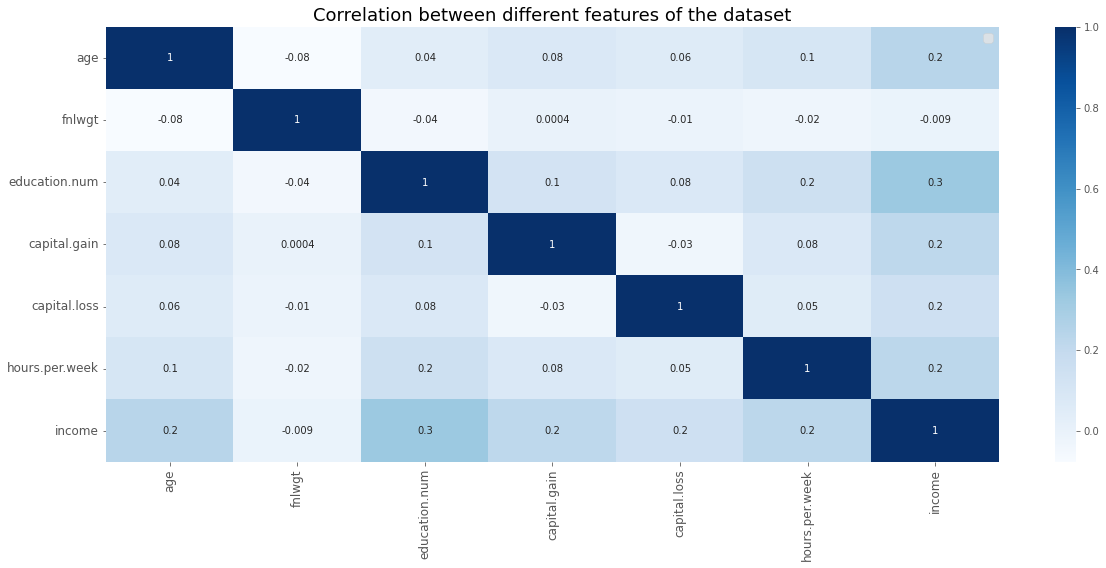

In [27]:
plt.title("Correlation between different features of the dataset", fontsize = 18)
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt='.1g')
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12);

# Building The Model

### Encoding Categorical Columns

In [28]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']

le = LabelEncoder()
for col in categorical:
    le.fit(df[col])
    df[col] = le.transform(df[col])

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X=df.drop('income', axis=1)
y=df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale the Data

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

## Logistic Regression

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [32]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 82.19%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.841088     0.719023  0.821911      0.780056      0.810949
recall         0.941384     0.457510  0.821911      0.699447      0.821911
f1-score       0.888414     0.559203  0.821911      0.723808      0.807129
support    15900.000000  5213.000000  0.821911  21113.000000  21113.000000
_______________________________________________
Confusion Matrix: 
 [[14968   932]
 [ 2828  2385]]



In [33]:
print_score(model, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 81.81%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.835171     0.727082  0.818101     0.781126      0.807757
recall        0.942256     0.452723  0.818101     0.697490      0.818101
f1-score      0.885488     0.558002  0.818101     0.721745      0.802431
support    6754.000000  2295.000000  0.818101  9049.000000   9049.000000
_______________________________________________
Confusion Matrix: 
 [[6364  390]
 [1256 1039]]



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [35]:
# randomised search CV

#number of tress in random forest
n_estimators=[int(x) for x in np.linspace(0,1200,12)]

#number of features in every split
max_features=['auto','sqrt']

#max numberof levels in tree
max_depth=[int(x) for x in np.linspace(5,30,6)]

#min number of samples required to split the node
min_samples_split = [2, 5, 10, 15, 100]

#min number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [36]:
from sklearn.model_selection import RandomizedSearchCV

# create the random grid
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [0, 109, 218, 327, 436, 545, 654, 763, 872, 981, 1090, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
rf_random=RandomizedSearchCV(estimator = model, 
                             param_distributions = random_grid,
                             scoring='neg_mean_squared_error', 
                             n_iter = 10, 
                             cv = 5,
                             verbose=2,
                             random_state=42,
                             n_jobs=1)

In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   8.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   8.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   8.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=872; total time=   8.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1090; total time=  13.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1090; total time=  13.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [0, 109, 218, 327, 436,
                                                         545, 654, 763, 872,
                                                         981, 1090, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
y_pred=rf_random.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
print_score(rf_random, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 89.03%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.898913     0.854207  0.890257      0.876560      0.887875
recall         0.962516     0.669864  0.890257      0.816190      0.890257
f1-score       0.929628     0.750887  0.890257      0.840257      0.885495
support    15900.000000  5213.000000  0.890257  21113.000000  21113.000000
_______________________________________________
Confusion Matrix: 
 [[15304   596]
 [ 1721  3492]]



In [41]:
print_score(rf_random, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 85.51%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.873268     0.779863  0.855122     0.826566      0.849579
recall        0.942701     0.597386  0.855122     0.770043      0.855122
f1-score      0.906657     0.676536  0.855122     0.791597      0.848294
support    6754.000000  2295.000000  0.855122  9049.000000   9049.000000
_______________________________________________
Confusion Matrix: 
 [[6367  387]
 [ 924 1371]]



## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [43]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [44]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 84.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.867987     0.746454  0.845261      0.807221      0.837979
recall         0.937044     0.565317  0.845261      0.751181      0.845261
f1-score       0.901195     0.643380  0.845261      0.772287      0.837538
support    15900.000000  5213.000000  0.845261  21113.000000  21113.000000
_______________________________________________
Confusion Matrix: 
 [[14899  1001]
 [ 2266  2947]]



In [45]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 82.88%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.854806     0.717620  0.828821     0.786213      0.820013
recall        0.928339     0.535948  0.828821     0.732143      0.828821
f1-score      0.890056     0.613619  0.828821     0.751838      0.819946
support    6754.000000  2295.000000  0.828821  9049.000000   9049.000000
_______________________________________________
Confusion Matrix: 
 [[6270  484]
 [1065 1230]]



# Feature Importance

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

Text(0.5, 1.0, 'Visualizing Important Features')

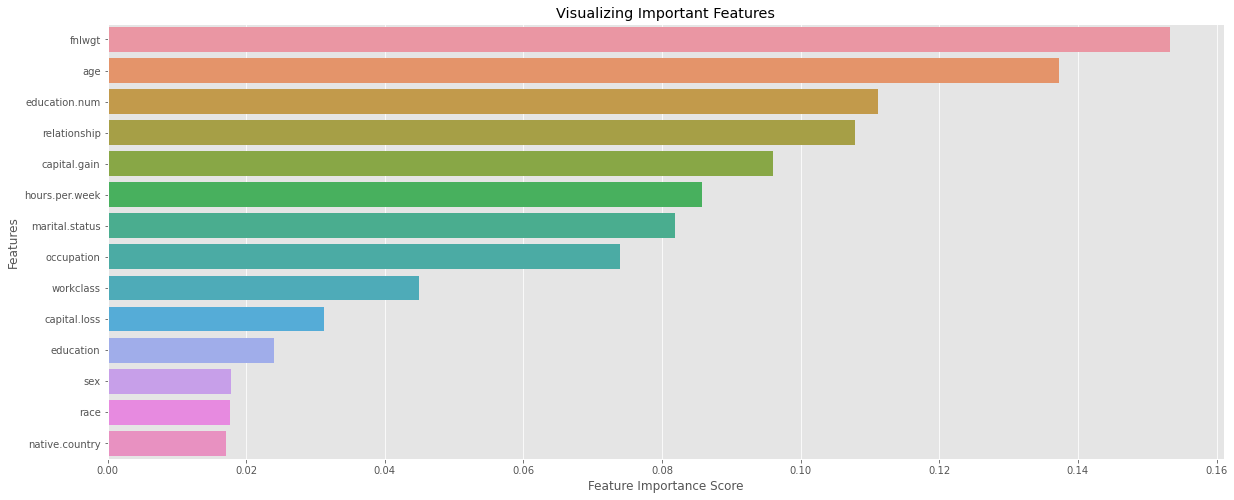

In [47]:
feature_importance=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
